In [ ]:
# Importing essential libraries
import numpy as np
import pandas as pd

# LOAD DATA

In [ ]:
# Loading the dataset
df = pd.read_csv("kaggle_movie_train.csv")

# EXPLORE DATA

In [ ]:
df.columns

Index(['id', 'text', 'genre'], dtype='object')

In [ ]:
df.shape

(22579, 3)

In [ ]:
movies_train = df.head(5000)
movies_train

,id,text,genre
0,0,"eady dead, maybe even wishing he was. INT. 2ND...",thriller
1,2,"t, summa cum laude and all. And I'm about to l...",comedy
2,3,"up Come, I have a surprise.... She takes him ...",drama
3,4,ded by the two detectives. INT. JEFF'S APARTME...,thriller
4,5,"nd dismounts, just as the other children reach...",drama
...,...,...,...
4995,6256,BED NIGHT Brian and Jennifer are into the rhy...,drama
4996,6257,s shimmering engaging its cloak. 112 INT. ENTE...,thriller
4997,6258,R. FELDMAN I can't wait to take a look. he cla...,drama
4998,6259,"etal folding chairs. Michael, who sits next to...",other


In [ ]:
# Importing essential libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

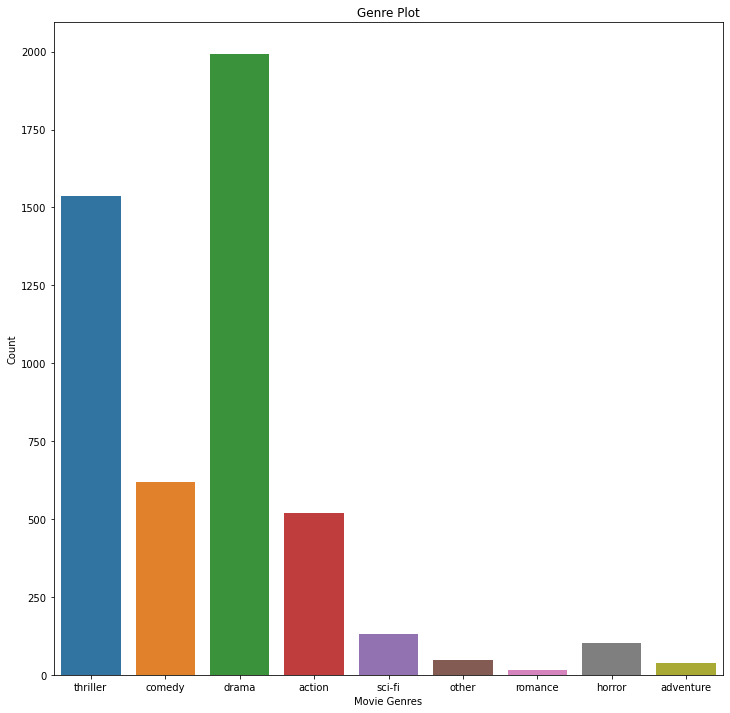

In [ ]:
# Visualizing the count of 'genre' column from the dataset
plt.figure(figsize=(12,12))
sns.countplot(x='genre', data=movies_train)
plt.xlabel('Movie Genres')
plt.ylabel('Count')
plt.title('Genre Plot')
plt.show()

# DATA CLEANING AND PREPROCESSING

In [ ]:
# Finding unique genres
movie_genre = list(movies_train['genre'].unique())
movie_genre.sort()
movie_genre

['action',
 'adventure',
 'comedy',
 'drama',
 'horror',
 'other',
 'romance',
 'sci-fi',
 'thriller']

In [ ]:
# Mapping the genres to values
genre_mapper = {'other': 0, 'action': 1, 'adventure': 2, 'comedy':3, 'drama':4, 'horror':5, 'romance':6, 'sci-fi':7, 'thriller': 8}
movies_train['genre'] = movies_train['genre'].map(genre_mapper)
movies_train.head(10)

<ipython-input-9-65a3469504dd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_train['genre'] = movies_train['genre'].map(genre_mapper)


,id,text,genre
0,0,"eady dead, maybe even wishing he was. INT. 2ND...",8
1,2,"t, summa cum laude and all. And I'm about to l...",3
2,3,"up Come, I have a surprise.... She takes him ...",4
3,4,ded by the two detectives. INT. JEFF'S APARTME...,8
4,5,"nd dismounts, just as the other children reach...",4
5,6,breadth of the bluff. Gabe pulls out his ancie...,8
6,7,uilding. A MAN in pajamas runs out into the ra...,8
7,9,ELLES AND RITA HAYWORTH Just disgustingly rich...,4
8,10,"Memphis goes back into the garage, Budgy cack...",8
9,11,e reels as the world spins. Sweat pours off hi...,1


In [ ]:
# Finding any NaN values
movies_train.isna().any()

id       False
text     False
genre    False
dtype: bool

In [ ]:
# Importing essential libraries for performing Natural Language Processing on given dataset
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [ ]:
movies_train.shape

(5000, 3)

In [ ]:
# Cleaning the text
corpus = []
ps = PorterStemmer()

for i in range(0, movies_train.shape[0]):

  # Cleaning special character from the dialog/script
  all_text = re.sub(pattern='[^a-zA-Z]', repl=' ', string=movies_train['text'][i])

  # Converting the entire dialog/script into lower case
  all_text = all_text.lower()

  # Tokenizing the dialog/script by words
  words = all_text.split()

  # Removing the stop words
  all_text_words = [word for word in words if word not in set(stopwords.words('english'))]

  # Stemming the words
  words = [ps.stem(word) for word in all_text_words]

  # Joining the stemmed words
  all_text = ' '.join(words)

  # Creating a corpus
  corpus.append(all_text)

In [ ]:
len(corpus)

5000

# COUNT VECTORIZER

In [ ]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=10000, ngram_range=(1,2))
X = cv.fit_transform(corpus).toarray()

In [ ]:
y = movies_train['genre'].values

# MODEL BUILDING

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
print('X_train size: {}, X_test size: {}'.format(X_train.shape, X_test.shape))

X_train size: (4000, 10000), X_test size: (1000, 10000)


In [ ]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import MultinomialNB
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

MultinomialNB()

In [ ]:
# Predicting the Test set results
nb_y_pred = nb_classifier.predict(X_test)

# EVALUATE MULTINOMIAL NAIVE BAYES MODEL

In [ ]:
# Calculating Accuracy
from sklearn.metrics import accuracy_score
score1 = accuracy_score(y_test, nb_y_pred)
print("---- Score ----")
print("Accuracy score is: {}%".format(round(score1*100,2)))

---- Score ----
Accuracy score is: 82.8%


In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
nb_cm = confusion_matrix(y_test, nb_y_pred)

In [ ]:
nb_cm

array([[  6,   1,   0,   0,   3,   0,   0,   1,   1],
       [  0, 118,   0,   3,   4,   0,   0,   0,   6],
       [  0,   1,   6,   0,   0,   0,   0,   0,   0],
       [  0,   3,   0,  95,   9,   2,   0,   1,  10],
       [  0,   6,   0,   8, 311,   0,   0,   0,  44],
       [  0,   0,   0,   0,   6,  10,   0,   0,   6],
       [  0,   0,   0,   0,   1,   0,   0,   0,   0],
       [  0,   2,   0,   1,   5,   0,   0,  18,   4],
       [  0,   3,   0,   6,  29,   1,   0,   5, 264]], dtype=int64)

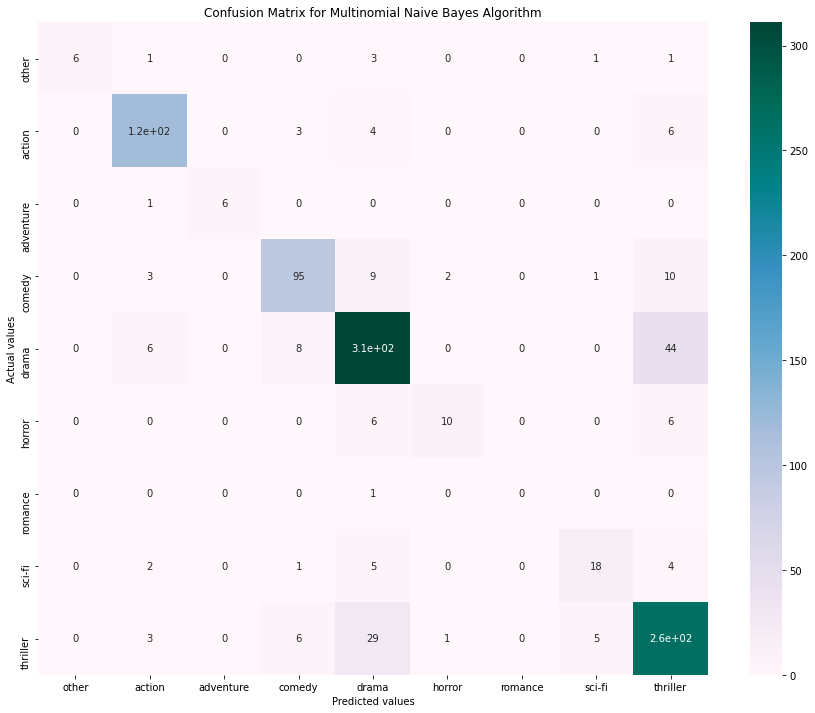

In [ ]:
# Plotting the confusion matrix
plt.figure(figsize=(15,12))
axis_labels = ['other', 'action', 'adventure', 'comedy', 'drama', 'horror', 'romance', 'sci-fi', 'thriller']
sns.heatmap(data=nb_cm, annot=True, cmap="PuBuGn", xticklabels=axis_labels, yticklabels=axis_labels)
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for Multinomial Naive Bayes Algorithm')
plt.show()

In [ ]:
# Hyperparameter tuning the Naive Bayes Classifier
best_accuracy = 0.0
alpha_val = 0.0
for i in np.arange(0.1,1.1,0.1):
  temp_classifier = MultinomialNB(alpha=i)
  temp_classifier.fit(X_train, y_train)
  temp_y_pred = temp_classifier.predict(X_test)
  score = accuracy_score(y_test, temp_y_pred)
  print("Accuracy score for alpha={} is: {}%".format(round(i,1), round(score*100,2)))
  if score>best_accuracy:
    best_accuracy = score
    alpha_val = i
print('--------------------------------------------')
print('The best accuracy is {}% with alpha value as {}'.format(round(best_accuracy*100, 2), round(alpha_val,1)))

Accuracy score for alpha=0.1 is: 85.6%
Accuracy score for alpha=0.2 is: 85.3%
Accuracy score for alpha=0.3 is: 85.0%
Accuracy score for alpha=0.4 is: 84.9%
Accuracy score for alpha=0.5 is: 84.1%
Accuracy score for alpha=0.6 is: 83.8%
Accuracy score for alpha=0.7 is: 83.7%
Accuracy score for alpha=0.8 is: 83.4%
Accuracy score for alpha=0.9 is: 83.1%
Accuracy score for alpha=1.0 is: 82.8%
--------------------------------------------
The best accuracy is 85.6% with alpha value as 0.1


In [ ]:
classifier = MultinomialNB(alpha=0.1)
classifier.fit(X_train, y_train)

MultinomialNB(alpha=0.1)

# PREDICTION

In [ ]:
def genre_prediction(test_script):
  test_script = re.sub(pattern='[^a-zA-Z]',repl=' ', string = test_script)
  test_script = test_script.lower()
  test_script_words = test_script.split()
  test_script_words = [word for word in test_script_words if not word in set(stopwords.words('english'))]
  ps = PorterStemmer()
  final_script = [ps.stem(word) for word in test_script_words]
  final_script = ' '.join(final_script)

  temp = cv.transform([final_script]).toarray()
  return classifier.predict(temp)[0]

In [ ]:
# Loading test dataset
movies_test = df.tail(500)
movies_test.columns

Index(['id', 'text', 'genre'], dtype='object')

In [ ]:
movies_test.shape

(500, 3)

In [ ]:
movies_test

,id,text,genre
22079,27544,not going to happen unless you make it happen...,thriller
22080,27545,ing race off. EXT. UNDERWATER NIGHT The S.E.A....,thriller
22081,27547,support column head on. He and Sarah are slamm...,thriller
22082,27548,"and BARBARA, two older neighbors of George's n...",drama
22083,27550,ing to slow it down. Victor rips the door open...,drama
...,...,...,...
22574,28161,n in the world to decide what I'm going to do ...,drama
22575,28162,shards. BOJO LAZ! Laz pushes Deke back through...,drama
22576,28163,"OTTIE You've got a thing about Ernie's, haven'...",thriller
22577,28165,....with marked skill and dexterity . LANA wry...,action


## CORRECT PREDICTION

In [ ]:
# Predicting values (any number from 22079 to 22578)

test_index = 22079

test_script = movies_test.text[test_index]
test_ID = movies_test.id[test_index]
test_actual_genre = movies_test.genre[test_index]

print('ID: {}'.format(test_ID))
print('Script: {}'.format(test_script))
value = genre_prediction(test_script)
print('Predicted Genre: {}'.format(list(genre_mapper.keys())[value]))
print('Actual Genre: {}'.format(test_actual_genre))

ID: 27544
Script:  not going to happen unless you make it happen, my friend. You're going to have to assert yourself a little bit more. Show your affection. HIDER Yeah, maybe you're right. Everything else is just an excuse. I'm treating the situation with kid gloves because I'm afraid of losing her. THERAPIST Ask her how she feels. HIDER I should. THERAPIST You have to put yourself out there a bit more. HIDER Right. THERAPIST Because life isn't about playing it safe. Life is about taking risks. CUT TO INT. THE HOUSE MASTER BEDROOM NIGHT Phil is packing a suitcase. Julie has her arms folded and is looking grim. JULIE Boy, you really buckle under a little pressure, don't you? PHIL This is for the best, you know it is. slams a drawer Why do my socks keep disappearing! JULIE mimicking him Honey, I'm a zombie, I don't know whether I'm coming or going. CUT TO EXT. DRIVEWAY NIGHT Phil comes out of the house, followed by Julie. He stuffs his suitcase in his car. JULIE You're even sadder and mo

In [ ]:
# Predicting values (any number from 22079 to 22578)
test_index = 22222

test_script = movies_test.text[test_index]
test_ID = movies_test.id[test_index]
test_actual_genre = movies_test.genre[test_index]

print('ID: {}'.format(test_ID))
print('Script: {}'.format(test_script))
value = genre_prediction(test_script)
print('Predicted Genre: {}'.format(list(genre_mapper.keys())[value]))
print('Actual Genre: {}'.format(test_actual_genre))

ID: 27730
Script: e over hanging branches...the Paraski is CATAPULTED into a tree and EXPLODES... EXT. WOODS CONTINUOUS Coming in to pick up the pursuit of Bond is Paraski 2, firing down at Bond, dropping bombs which explode just behind him in the snow. The other two paraskis LAND and eject their chutes, now RACING THROUGH THE WOODS on the ground. Bond looks behind him, sees them gaining...he zigzags through the trees and suckers Paraski 3 to glance off one tree, hit another and wipe out behind. But the remaining predator on the ground, Paraski 4, is gaining on him...Bond bursts out of the trees and finds himself heading toward... THE EDGE OF A PRECIPICE... He cranks himself right, narrowly avoiding a tumble over the edge. Paraski 4 isn t so lucky and SAILS OFF THE CLIFF to a hundred and fifty foot drop. BOND smiling Should have stuck to snowboarding. But the smile is wiped off his face as...AN EMERGENCY PARACHUTE deploys from the back... The Paraski does a climbing turn and heads stra

## WRONG PREDICTION

In [ ]:
# Predicting values (any number from 22079 to 22578)
test_index = 22124

test_script = movies_test.text[test_index]
test_ID = movies_test.id[test_index]
test_actual_genre = movies_test.genre[test_index]

print('ID: {}'.format(test_ID))
print('Script: {}'.format(test_script))
value = genre_prediction(test_script)
print('Predicted Genre: {}'.format(list(genre_mapper.keys())[value]))
print('Actual Genre: {}'.format(test_actual_genre))

ID: 27603
Script:  to the King Pin working on his nails. KING PIN Ow! Watch the pinkie! This isn't so bad. Jake almost has to stifle a laugh. KING PIN Every time, you get the pinkie and I get a hang nail. to Jake You Jake? Jake nods and the King motions for the manicurist to leave. KING PIN Grifter huh? Where have you been on the grift? Couldn't been here long 'cause I would have heard of you, Skippy. JAKE Jake. You can call me Jake. Here and there. KING PIN Here and there, Scooter? Here and there like Boston, Chicago, Houston? The bay area? Some action in London, 'til it turned nickel and dime. Or how about that little stint down in Miami? Heard you actually got into some trouble with the Feds down there. You guy's pretty good? JAKE I have a good crew. KING PIN Minus one. Jake visibly bristles... JAKE Minus one. KING PIN You know, back in the day, grafting was considered a gentleman's racket. Good suits, good food... The Underworld of the Underworld. A grifter had to survive on his wi

## PREDICTION WITH SCRIPT OUTSIDE FROM DATASET

In [ ]:
test_script = """Another rocket goes off, lighting up the entire area... there are a dozen boats moving outward from the ship.207 AT THE BOAT DECK RAIL Captain Smith is shouting to Boat 6 through a large metal megaphone. SMITH Come back! Come back to the ship! CHIEF OFFICER WILDE joins him, blowing his silver whistle.208 FROM BOAT 6 the whistle comes shrilly across the water. Quartermaster Hitchins grips the rudder in fear.HITCHINS The suction will pull us right down if we don't keep going. MOLLY We got room for lots more. I say we go back. HITCHINS No! It's our lives now, not theirs. And I'm in charge of this boat! Now row!! 209 CAPTAIN SMITH, at the rail of the boat deck, lowers his megaphone slowly SMITH The fools."""
test_title = 'Titanic (outsourced from Google)'
test_actual_genre = 'drama'

print('Title: {}'.format(test_title))
print('Script: {}'.format(test_script))
value = genre_prediction(test_script)
print('Predicted Genre: {}'.format(list(genre_mapper.keys())[value]))
print('Actual Genre: {}'.format(test_actual_genre))

Title: Titanic (outsourced from Google)
Script: Another rocket goes off, lighting up the entire area... there are a dozen boats moving outward from the ship.207 AT THE BOAT DECK RAIL Captain Smith is shouting to Boat 6 through a large metal megaphone. SMITH Come back! Come back to the ship! CHIEF OFFICER WILDE joins him, blowing his silver whistle.208 FROM BOAT 6 the whistle comes shrilly across the water. Quartermaster Hitchins grips the rudder in fear.HITCHINS The suction will pull us right down if we don't keep going. MOLLY We got room for lots more. I say we go back. HITCHINS No! It's our lives now, not theirs. And I'm in charge of this boat! Now row!! 209 CAPTAIN SMITH, at the rail of the boat deck, lowers his megaphone slowly SMITH The fools.
Predicted Genre: drama
Actual Genre: drama


In [ ]:
test_script = """ROSE I love you Jack.He takes her hand. JACK No... don't say your good-byes, Rose. Don't you give up. Don't do it. ROSE I'm so cold. JACK You're going to get out of this... you're going to go on and you're going to make babies and watch them grow and you're going to die an old lady, warm in your bed. Not here. Not this night. Do you understand me? ROSE I can't feel my body. JACK Rose, listen to me. Listen. Winning that ticket was the best thing that ever happened to me. Jack is having trouble getting the breath to speak. JACK It brought me to you. And I'm thankful, Rose. I'm thankful."""
test_title = 'Titanic (outsourced from Google)'
test_actual_genre = 'romance'

print('Title: {}'.format(test_title))
print('Script: {}'.format(test_script))
value = genre_prediction(test_script)
print('Predicted Genre: {}'.format(list(genre_mapper.keys())[value]))
print('Actual Genre: {}'.format(test_actual_genre))

Title: Titanic (outsourced from Google)
Script: ROSE I love you Jack.He takes her hand. JACK No... don't say your good-byes, Rose. Don't you give up. Don't do it. ROSE I'm so cold. JACK You're going to get out of this... you're going to go on and you're going to make babies and watch them grow and you're going to die an old lady, warm in your bed. Not here. Not this night. Do you understand me? ROSE I can't feel my body. JACK Rose, listen to me. Listen. Winning that ticket was the best thing that ever happened to me. Jack is having trouble getting the breath to speak. JACK It brought me to you. And I'm thankful, Rose. I'm thankful.
Predicted Genre: drama
Actual Genre: romance
